In [1]:
from google.colab import drive                          

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('/content/drive/MyDrive/DSO_530_Spring_2023/Final Project/final_option_train_formatted.csv')

In [3]:
data.head()

,Value,S,K,tau,r,BS,BS_dummy,S_std,K_std,tau_std,r_std
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0,-1.232736,-0.778805,1.396842,-0.187526
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1,-1.844973,1.144491,-0.354382,1.841332
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0,-1.745757,-0.992504,0.640632,1.661787
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1,1.435988,0.930792,-1.389195,-0.923660
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0,0.772694,-1.206204,-0.354382,-1.103205


In [4]:
data.shape

(1676, 11)

In [5]:
data.describe(include='all')

,Value,S,K,tau,r,BS,BS_dummy,S_std,K_std,tau_std,r_std
count,1676.000000,1676.000000,1676.000000,1676.000000,1676.000000,1676,1676.000000,1.676000e+03,1.676000e+03,1.676000e+03,1.676000e+03
unique,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,Under,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,945,NaN,NaN,NaN,NaN,NaN
mean,15.086521,440.902829,438.221957,0.202000,0.030234,NaN,0.436158,3.847360e-16,-1.089555e-15,-3.285624e-16,2.670895e-16
std,14.041374,7.529351,23.404317,0.099733,0.000557,NaN,0.496055,1.000298e+00,1.000298e+00,1.000298e+00,1.000298e+00
min,0.125000,425.472331,375.000000,0.003968,0.029510,NaN,0.000000,-2.049991e+00,-2.702101e+00,-1.986204e+00,-1.300705e+00
25%,2.246251,433.863864,420.000000,0.119048,0.029820,NaN,0.000000,-9.351491e-01,-7.788049e-01,-8.319880e-01,-7.441152e-01
50%,11.235294,442.579723,440.000000,0.202381,0.030130,NaN,0.000000,2.227809e-01,7.599340e-02,3.823317e-03,-1.875259e-01
75%,25.766604,447.320414,455.000000,0.285714,0.030540,NaN,1.000000,8.525969e-01,7.170921e-01,8.396346e-01,5.486084e-01


In [6]:
num_ones = (data['BS_dummy'] == 1).sum()
num_zeros = (data['BS_dummy'] == 0).sum()

In [7]:
num_zeros

945

In [8]:
num_ones

731

**New Variables**

In [9]:
#add new variables
data['Moneyness'] = data['S']/data['K']
data['days_to_expiration'] = data['tau']*365

In [10]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

data['Moneyness_std'] = stdsc.fit_transform(np.array(data['Moneyness']).reshape(-1,1))
data['days_to_expiration_std'] = stdsc.fit_transform(np.array(data['days_to_expiration']).reshape(-1,1))
data

,Value,S,K,tau,r,BS,BS_dummy,S_std,K_std,tau_std,r_std,Moneyness,days_to_expiration,Moneyness_std,days_to_expiration_std
0,21.670404,431.623898,420.0,0.341270,0.03013,Under,0,-1.232736,-0.778805,1.396842,-0.187526,1.027676,124.563492,0.357457,1.396842
1,0.125000,427.015526,465.0,0.166667,0.03126,Over,1,-1.844973,1.144491,-0.354382,1.841332,0.918313,60.833333,-1.712535,-0.354382
2,20.691244,427.762336,415.0,0.265873,0.03116,Under,0,-1.745757,-0.992504,0.640632,1.661787,1.030753,97.043651,0.415691,0.640632
3,1.035002,451.711658,460.0,0.063492,0.02972,Over,1,1.435988,0.930792,-1.389195,-0.923660,0.981982,23.174603,-0.507428,-1.389195
4,39.553020,446.718974,410.0,0.166667,0.02962,Under,0,0.772694,-1.206204,-0.354382,-1.103205,1.089558,60.833333,1.528752,-0.354382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1.470000,444.397163,475.0,0.273810,0.03034,Over,1,0.464234,1.571890,0.720233,0.189518,0.935573,99.940476,-1.385843,0.720233
1672,34.927317,438.453825,410.0,0.301587,0.02972,Under,0,-0.325358,-1.206204,0.998837,-0.923660,1.069400,110.079365,1.147190,0.998837
1673,41.127997,428.042219,390.0,0.170635,0.03188,Under,0,-1.708573,-2.061002,-0.314581,2.954511,1.097544,62.281746,1.679902,-0.314581
1674,0.440003,439.081203,480.0,0.293651,0.02962,Over,1,-0.242009,1.785590,0.919236,-1.103205,0.914753,107.182540,-1.779927,0.919236


                           Value  BS_dummy     S_std     K_std   tau_std  \
Value                   1.000000 -0.753763  0.086632 -0.885894  0.046134   
BS_dummy               -0.753763  1.000000 -0.088621  0.750251  0.096933   
S_std                   0.086632 -0.088621  1.000000  0.211579 -0.128009   
K_std                  -0.885894  0.750251  0.211579  1.000000  0.138581   
tau_std                 0.046134  0.096933 -0.128009  0.138581  1.000000   
r_std                   0.042078 -0.067938 -0.458239 -0.173428  0.014981   
Moneyness_std           0.945344 -0.788326  0.106585 -0.947595 -0.170051   
days_to_expiration_std  0.046134  0.096933 -0.128009  0.138581  1.000000   

                           r_std  Moneyness_std  days_to_expiration_std  
Value                   0.042078       0.945344                0.046134  
BS_dummy               -0.067938      -0.788326                0.096933  
S_std                  -0.458239       0.106585               -0.128009  
K_std              

<Axes: >

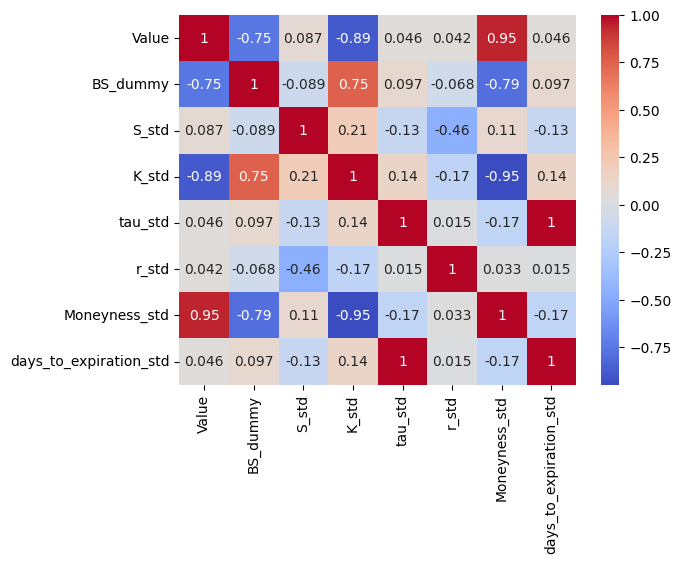

In [11]:
import pandas as pd

# Load the dataframe
df = data

# Select specific columns
selected_cols = ['Value', 'BS_dummy', 'S_std', 'K_std', 'tau_std','r_std', 'Moneyness_std', 'days_to_expiration_std']

# Create a subset of the dataframe with only the selected columns
df_selected = df[selected_cols]

# Create the correlation matrix for the selected columns
corr_matrix = df_selected.corr()

# Print the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

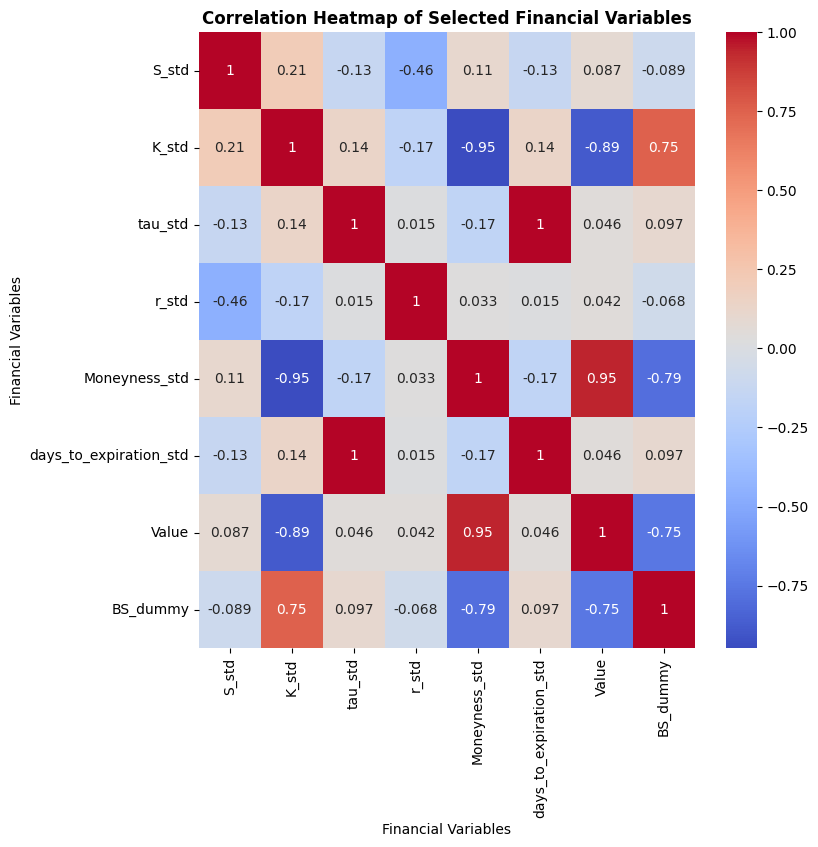

In [12]:
df = data

# Select specific columns
selected_cols = ['S_std', 'K_std', 'tau_std', 'r_std', 'Moneyness_std', 
                 'days_to_expiration_std', 'Value', 'BS_dummy']

# Create a subset of the dataframe with only the selected columns
df_selected = df[selected_cols]

# Create the correlation matrix for the selected columns
corr_matrix = df_selected.corr()

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", ax=ax)

# Set the title and axis labels
ax.set_title("Correlation Heatmap of Selected Financial Variables", fontweight = 'bold')
ax.set_xlabel("Financial Variables")
ax.set_ylabel("Financial Variables")

# Show the plot
plt.show()

# fig.savefig("correlation_heatmap2.png", dpi=300)
# fig.savefig('/content/drive/MyDrive/DSO_530_Spring_2023/Final Project/heatmap.png', dpi=300)

In [13]:
data.drop(columns=['S','K','tau','r','BS'], inplace=True)
data

,Value,BS_dummy,S_std,K_std,tau_std,r_std,Moneyness,days_to_expiration,Moneyness_std,days_to_expiration_std
0,21.670404,0,-1.232736,-0.778805,1.396842,-0.187526,1.027676,124.563492,0.357457,1.396842
1,0.125000,1,-1.844973,1.144491,-0.354382,1.841332,0.918313,60.833333,-1.712535,-0.354382
2,20.691244,0,-1.745757,-0.992504,0.640632,1.661787,1.030753,97.043651,0.415691,0.640632
3,1.035002,1,1.435988,0.930792,-1.389195,-0.923660,0.981982,23.174603,-0.507428,-1.389195
4,39.553020,0,0.772694,-1.206204,-0.354382,-1.103205,1.089558,60.833333,1.528752,-0.354382
...,...,...,...,...,...,...,...,...,...,...
1671,1.470000,1,0.464234,1.571890,0.720233,0.189518,0.935573,99.940476,-1.385843,0.720233
1672,34.927317,0,-0.325358,-1.206204,0.998837,-0.923660,1.069400,110.079365,1.147190,0.998837
1673,41.127997,0,-1.708573,-2.061002,-0.314581,2.954511,1.097544,62.281746,1.679902,-0.314581
1674,0.440003,1,-0.242009,1.785590,0.919236,-1.103205,0.914753,107.182540,-1.779927,0.919236


In [14]:
data.drop(columns=['Moneyness', 'days_to_expiration', 'Value', 'tau_std'], inplace=True)
data

,BS_dummy,S_std,K_std,r_std,Moneyness_std,days_to_expiration_std
0,0,-1.232736,-0.778805,-0.187526,0.357457,1.396842
1,1,-1.844973,1.144491,1.841332,-1.712535,-0.354382
2,0,-1.745757,-0.992504,1.661787,0.415691,0.640632
3,1,1.435988,0.930792,-0.923660,-0.507428,-1.389195
4,0,0.772694,-1.206204,-1.103205,1.528752,-0.354382
...,...,...,...,...,...,...
1671,1,0.464234,1.571890,0.189518,-1.385843,0.720233
1672,0,-0.325358,-1.206204,-0.923660,1.147190,0.998837
1673,0,-1.708573,-2.061002,2.954511,1.679902,-0.314581
1674,1,-0.242009,1.785590,-1.103205,-1.779927,0.919236


**Classification Model**

In [15]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:6].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.30,
                     random_state=0,
                     stratify=y)

In [16]:
y

array([0, 1, 0, ..., 0, 1, 1])

In [17]:
X

array([[-1.23273567, -0.77880485, -0.18752591,  0.35745664,  1.39684212],
       [-1.84497274,  1.14449122,  1.84133195, -1.71253537, -0.35438151],
       [-1.74575656, -0.99250442,  1.66178701,  0.41569098,  0.64063192],
       ...,
       [-1.70857326, -2.06100224,  2.9545106 ,  1.67990241, -0.31458097],
       [-0.24200886,  1.78558991, -1.10320512, -1.77992664,  0.91923568],
       [-1.16049088,  1.14449122, -0.5466158 , -1.5028176 ,  0.16302547]])

**1. Logistic Regression Model - No Penalty & Validation set approach**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

In [19]:
fit1 = LogisticRegression(random_state=0, 
                          penalty=None, 
                          max_iter = 10000).fit(X_train, y_train)
acc_1 = fit1.score(X_test, y_test)
acc_1

0.9184890656063618

In [20]:
error_1 = 1 - acc_1
print("BS Prediction =", error_1*100)

BS Prediction = 8.151093439363821


**2. Logistic Regression Model - CV & No Penalty & Best Subset Selection**

In [21]:
from sklearn.model_selection import cross_val_score

import time
import itertools
from itertools import combinations

In [22]:
kfolds_classification = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
predictors = ['S_std', 'K_std', 'r_std', 'Moneyness_std', 'days_to_expiration_std']

for i in range(1, len(predictors) + 1):
    for combo in combinations(predictors, i):
        X = data[list(combo)]
        y = data['BS_dummy']
        logistic_model = LogisticRegression(penalty=None, max_iter=10000)
        error_cv = cross_val_score(logistic_model, X, y, cv=kfolds_classification, scoring='accuracy')
        print(f"Predictors: {combo}, Mean classification error: {(1 - np.mean(error_cv))*100}")

Predictors: ('S_std',), Mean classification error: 44.92835757057313
Predictors: ('K_std',), Mean classification error: 12.532078699743355
Predictors: ('r_std',), Mean classification error: 43.615982321072146
Predictors: ('Moneyness_std',), Mean classification error: 9.426860564585105
Predictors: ('days_to_expiration_std',), Mean classification error: 45.647989734816086
Predictors: ('S_std', 'K_std'), Mean classification error: 9.486027944111775
Predictors: ('S_std', 'r_std'), Mean classification error: 43.19860279441119
Predictors: ('S_std', 'Moneyness_std'), Mean classification error: 9.486740804106065
Predictors: ('S_std', 'days_to_expiration_std'), Mean classification error: 44.56800684345594
Predictors: ('K_std', 'r_std'), Mean classification error: 12.05410607356715
Predictors: ('K_std', 'Moneyness_std'), Mean classification error: 9.367336755061295
Predictors: ('K_std', 'days_to_expiration_std'), Mean classification error: 12.532078699743355
Predictors: ('r_std', 'Moneyness_std'

**We know from running the best subset selection that including 'S_std', 'K_std', 'r_std', 'Moneyness_std', 'days_to_expiration_std' is the best way to go and give us the least mean classification error**

**3. Logistic Regression Model - CV & L1 Penalty & Validation set approach**

In [23]:
kfolds_classification = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

In [24]:
fit1 = LogisticRegressionCV(Cs=30, random_state=1, 
                            penalty='l1', solver='saga', 
                            cv=kfolds_classification, 
                            max_iter=10000).fit(X_train, y_train)

In [25]:
fit1.Cs_

array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04])

In [26]:
accuracy = fit1.score(X_test, y_test)
print("BS Prediction:", (1 - accuracy)*100)

BS Prediction: 7.952286282306165


In [27]:
X_train

array([[ 1.91625284,  0.93079166,  0.7461078 , -0.35868072, -1.58819816],
       [-0.22904645,  1.57189035, -0.00798097, -1.59378419, -0.03597722],
       [-0.04054066, -1.20620398, -0.00798097,  1.24616091, -1.11059172],
       ...,
       [-1.97656642, -1.41990355,  2.9545106 ,  0.81622005,  0.79983407],
       [ 0.43619679,  1.57189035, -0.5466158 , -1.39425194, -0.51358366],
       [ 0.8651628 ,  0.28969297,  0.54860836, -0.06366588,  0.60083138]])

In [28]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

**4. Logistic Regression Model - CV & L2 Penalty & Validation set approach**

In [29]:
kfolds_classification = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)

In [30]:
fit2 = LogisticRegressionCV(Cs=30,random_state=1,
                            penalty='l2',
                            cv=kfolds_classification,
                            max_iter=10000).fit(X_train, y_train)
fit2.score(X_test, y_test)

0.9204771371769384

In [31]:
accuracy = fit2.score(X_test, y_test)
print("BS Prediction:", (1 - accuracy)*100)

BS Prediction: 7.952286282306165


In [32]:
fit2.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

**5. Random Forest & Validation set approach**

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [35]:
data

,BS_dummy,S_std,K_std,r_std,Moneyness_std,days_to_expiration_std
0,0,-1.232736,-0.778805,-0.187526,0.357457,1.396842
1,1,-1.844973,1.144491,1.841332,-1.712535,-0.354382
2,0,-1.745757,-0.992504,1.661787,0.415691,0.640632
3,1,1.435988,0.930792,-0.923660,-0.507428,-1.389195
4,0,0.772694,-1.206204,-1.103205,1.528752,-0.354382
...,...,...,...,...,...,...
1671,1,0.464234,1.571890,0.189518,-1.385843,0.720233
1672,0,-0.325358,-1.206204,-0.923660,1.147190,0.998837
1673,0,-1.708573,-2.061002,2.954511,1.679902,-0.314581
1674,1,-0.242009,1.785590,-1.103205,-1.779927,0.919236


In [36]:
from sklearn.model_selection import train_test_split
X, y = data.iloc[:, 1:].values, data.iloc[:, 0].values
X_train, X_test, y_train, y_test =\
    train_test_split(X, y,
                     test_size=0.30,
                     random_state=0,
                     stratify=y)

In [37]:
X_train

array([[ 1.91625284,  0.93079166,  0.7461078 , -0.35868072, -1.58819816],
       [-0.22904645,  1.57189035, -0.00798097, -1.59378419, -0.03597722],
       [-0.04054066, -1.20620398, -0.00798097,  1.24616091, -1.11059172],
       ...,
       [-1.97656642, -1.41990355,  2.9545106 ,  0.81622005,  0.79983407],
       [ 0.43619679,  1.57189035, -0.5466158 , -1.39425194, -0.51358366],
       [ 0.8651628 ,  0.28969297,  0.54860836, -0.06366588,  0.60083138]])

In [38]:
y_train

array([0, 1, 0, ..., 0, 1, 0])

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define a list of values for n_estimators to try
n_estimators_list = [10, 50, 100, 150, 200]

# Initialize a list to store the classification error for each n_estimators value
error_list = []

for n_estimators in n_estimators_list:
    clf_rf = RandomForestClassifier(random_state=1, n_estimators=n_estimators, max_depth=10)
    clf_rf.fit(X_train, y_train)
    y_pred_rf = clf_rf.predict(X_test)
    
    error = 1 - accuracy_score(y_test, y_pred_rf)
    
    error_list.append(error)
    print(f"n_estimators: {n_estimators}, classification error: {error * 100:.2f}%")

# Find the n_estimators value with the lowest classification error
min_error = min(error_list)
min_error_index = error_list.index(min_error)
optimal_n_estimators = n_estimators_list[min_error_index]
print(f"\nThe optimal n_estimators value is {optimal_n_estimators}, with a classification error of {min_error * 100:.2f}%")

n_estimators: 10, classification error: 6.96%
n_estimators: 50, classification error: 7.16%
n_estimators: 100, classification error: 7.16%
n_estimators: 150, classification error: 6.56%
n_estimators: 200, classification error: 6.76%

The optimal n_estimators value is 150, with a classification error of 6.56%


In [40]:
final_clf_rf = RandomForestClassifier(random_state=1, n_estimators=150, max_depth=10)
final_clf_rf.fit(X_train, y_train)
final_y_pred_rf = final_clf_rf.predict(X_test)

In [42]:
final_error = 1 - accuracy_score(y_test, final_y_pred_rf)
final_error*100

6.560636182902579

In [43]:
final_clf_rf.feature_importances_

array([0.06939291, 0.27672693, 0.04249841, 0.54527324, 0.06610851])

In [44]:
X_train = pd.DataFrame(X_train)

In [45]:
# Optional: Set column names
X_train.columns = ['S_std', 'K_std', 'r_std', 'Moneyness_std', 'days_to_expiration_std']
X_train

,S_std,K_std,r_std,Moneyness_std,days_to_expiration_std
0,1.916253,0.930792,0.746108,-0.358681,-1.588198
1,-0.229046,1.571890,-0.007981,-1.593784,-0.035977
2,-0.040541,-1.206204,-0.007981,1.246161,-1.110592
3,-1.067657,1.144491,-0.367071,-1.474374,0.481430
4,0.668865,-0.351406,0.189518,0.535148,-0.274780
...,...,...,...,...,...
1168,0.907094,0.717092,0.369063,-0.468788,0.561031
1169,0.904997,-0.992504,-0.367071,1.325704,-1.070791
1170,-1.976566,-1.419904,2.954511,0.816220,0.799834
1171,0.436197,1.571890,-0.546616,-1.394252,-0.513584


Text(0.5, 0, 'Random Forest Feature Importance')

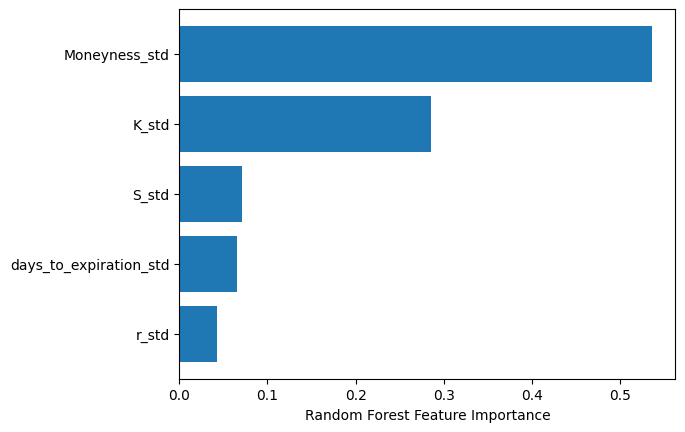

In [46]:
## plot the top features
fig, axes = plt.subplots(nrows = 1,ncols = 1)
sorted_idx = clf_rf.feature_importances_.argsort()
plt.barh(X_train.columns[sorted_idx], clf_rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [47]:
data

,BS_dummy,S_std,K_std,r_std,Moneyness_std,days_to_expiration_std
0,0,-1.232736,-0.778805,-0.187526,0.357457,1.396842
1,1,-1.844973,1.144491,1.841332,-1.712535,-0.354382
2,0,-1.745757,-0.992504,1.661787,0.415691,0.640632
3,1,1.435988,0.930792,-0.923660,-0.507428,-1.389195
4,0,0.772694,-1.206204,-1.103205,1.528752,-0.354382
...,...,...,...,...,...,...
1671,1,0.464234,1.571890,0.189518,-1.385843,0.720233
1672,0,-0.325358,-1.206204,-0.923660,1.147190,0.998837
1673,0,-1.708573,-2.061002,2.954511,1.679902,-0.314581
1674,1,-0.242009,1.785590,-1.103205,-1.779927,0.919236


**Prediction**

In [48]:
test_data = pd.read_csv('/content/drive/MyDrive/DSO_530_Spring_2023/Final Project/Copy of option_test_wolabel_2.csv')

In [49]:
test_data

,S,K,tau,r,Moneyness,days_to_expiration,S_std,K_std,tau_std,r_std,Moneyness_std,days_to_expiration_std
0,431.618600,460,0.293651,0.03147,0.938301,107.182540,-1.244577,0.824029,0.872239,2.301632,-1.238708,0.872239
1,432.633296,420,0.182540,0.03147,1.030079,66.626984,-1.111534,-0.858199,-0.203862,2.301632,0.483070,-0.203862
2,432.633296,430,0.182540,0.03147,1.006124,66.626984,-1.111534,-0.437642,-0.203862,2.301632,0.033662,-0.203862
3,431.618600,415,0.293651,0.03147,1.040045,107.182540,-1.244577,-1.068477,0.872239,2.301632,0.670026,0.872239
4,434.772855,420,0.043651,0.03147,1.035173,15.932540,-0.831002,-0.858199,-1.548988,2.301632,0.578638,-1.548988
...,...,...,...,...,...,...,...,...,...,...,...,...
1115,440.067417,435,0.182540,0.02962,1.011649,66.626984,-0.136798,-0.227364,-0.203862,-1.111854,0.137318,-0.203862
1116,439.081203,485,0.293651,0.02962,0.905322,107.182540,-0.266107,1.875421,0.872239,-1.111854,-1.857407,0.872239
1117,439.081203,475,0.293651,0.02962,0.924381,107.182540,-0.266107,1.454864,0.872239,-1.111854,-1.499847,0.872239
1118,442.490015,420,0.043651,0.02962,1.053548,15.932540,0.180844,-0.858199,-1.548988,-1.111854,0.923343,-1.548988


In [50]:
X = test_data.drop(columns=['S','K','tau','r','Moneyness', 'days_to_expiration', 'tau_std'])
X

,S_std,K_std,r_std,Moneyness_std,days_to_expiration_std
0,-1.244577,0.824029,2.301632,-1.238708,0.872239
1,-1.111534,-0.858199,2.301632,0.483070,-0.203862
2,-1.111534,-0.437642,2.301632,0.033662,-0.203862
3,-1.244577,-1.068477,2.301632,0.670026,0.872239
4,-0.831002,-0.858199,2.301632,0.578638,-1.548988
...,...,...,...,...,...
1115,-0.136798,-0.227364,-1.111854,0.137318,-0.203862
1116,-0.266107,1.875421,-1.111854,-1.857407,0.872239
1117,-0.266107,1.454864,-1.111854,-1.499847,0.872239
1118,0.180844,-0.858199,-1.111854,0.923343,-1.548988


In [51]:
X_array = X.values
X_array

array([[-1.24457693,  0.82402872,  2.30163216, -1.23870781,  0.87223892],
       [-1.11153361, -0.85819897,  2.30163216,  0.48306996, -0.20386212],
       [-1.11153361, -0.43764205,  2.30163216,  0.03366192, -0.20386212],
       ...,
       [-0.26610732,  1.45486411, -1.11185423, -1.4998472 ,  0.87223892],
       [ 0.18084386, -0.85819897, -1.11185423,  0.92334263, -1.54898842],
       [-0.13679849, -0.43764205, -1.11185423,  0.35800139, -0.20386212]])

In [52]:
prediction_y_pred_rf = final_clf_rf.predict(X_array)

In [53]:
prediction_y_pred_rf

array([1, 0, 0, ..., 1, 0, 0])

In [54]:
print(prediction_y_pred_rf)

[1 0 0 ... 1 0 0]


In [55]:
# Create a DataFrame with column name "BS"
df = pd.DataFrame({'BS': prediction_y_pred_rf})

# Print the DataFrame
df

,BS
0,1
1,0
2,0
3,0
4,0
...,...
1115,1
1116,1
1117,1
1118,0


In [56]:
df.to_csv("/content/drive/MyDrive/DSO_530_Spring_2023/Final Project/Final BS Prediction.csv", index=False)